In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
categories = []
with open('categories_list.txt') as f:
    for line in f:
        categories.append(line[:-1])

In [3]:
data = pd.read_csv('less_review.tsv',sep='\t',header=None,names=['star','year','categories'])
data = data.dropna().reset_index(drop=True)

In [4]:
data['categories'].isnull().any()

False

In [6]:
for cate in categories:
    tmp = data.loc[data['categories'].str.contains(cate)]
    tmp.drop('categories',axis=1,inplace=True)
    tmp.to_csv(f'yeardata/{cate}.tsv',index=False)

/home/jameson/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4164: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [18]:
test_data = pd.read_csv('./yeardata/Automotive.tsv')
test_data = test_data[test_data['year']>2015].reset_index(drop=True)
test_data.head()

,star,year
0,5.0,2018
1,5.0,2017
2,5.0,2016
3,5.0,2017
4,5.0,2017


In [19]:
test_data['count'] = 1
groupresult = test_data.groupby(['year','star']).count()

<AxesSubplot:xlabel='year,star'>

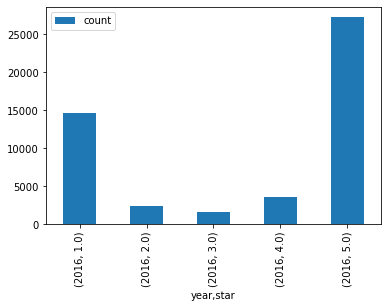

In [26]:
groupresult.loc[(2016,slice(None)),:].plot(kind='bar')

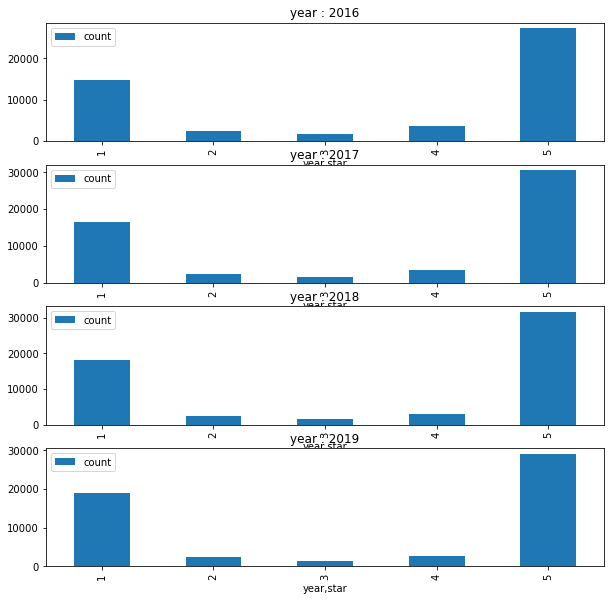

In [90]:
f, axs = plt.subplots(4,1,figsize=(10,10))
for i in range(4):
        groupresult.loc[(2016+i,slice(None)),:].plot(kind='bar',ax=axs[i])
        axs[i].set_xticklabels([1,2,3,4,5])
        axs[i].set_title(f'year : {2016+i}')

In [94]:
year_mean = test_data.groupby('year').mean()['star']

<AxesSubplot:xlabel='year'>

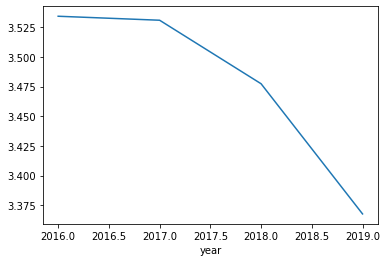

In [95]:
year_mean.plot()

In [100]:
import pymannkendall as mk

mk_data = year_mean.values

mk_result = mk.original_test(mk_data,alpha=0.1)

In [101]:
print(mk_result)

Mann_Kendall_Test(trend='decreasing', h=True, p=0.08942935902899363, z=-1.6984155512168937, Tau=-1.0, s=-6.0, var_s=8.666666666666666, slope=-0.05457484377671802, intercept=3.586037967031913)
